<a href="https://colab.research.google.com/github/LakshmisriDhanapal/SMS-detection/blob/main/spam_sms_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Know about Dataset**

In [ ]:
gyimort pandas as pd
df=pd.read_csv("seminar.csv")
df

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


**Label factor**

*  0 denotes the not a spam -> today we have important client meeting
*  1 denotes the spam -> 😲 hurry up win 10000






In [ ]:
df.shape

(5574, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

sms      0
label    0
dtype: int64

#**Text preprocessing**

*   why text preprocessing?
*   to increase the efficiency of the model.




In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Lowercase
lc= df['sms'].str.lower()
lc


0       go until jurong point, crazy.. available only ...
1                         ok lar... joking wif u oni...\n
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5569    this is the 2nd time we have tried 2 contact u...
5570               will ü b going to esplanade fr home?\n
5571    pity, * was in mood for that. so...any other s...
5572    the guy did some bitching but i acted like i'd...
5573                         rofl. its true to its name\n
Name: sms, Length: 5574, dtype: object

In [ ]:
# Remove punctuation
import re
pun=df["sms"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='*$^...'@#_]", " ", s).split()))
pun

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity was in mood for that So any other suggest...
5572    The guy did some bitching but I acted like i d...
5573                            Rofl Its true to its name
Name: sms, Length: 5574, dtype: object

In [ ]:
#Remove number
a = pun.str.replace('\d+', '')
a

<ipython-input-20-2fd1dca102e8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  a = pun.str.replace('\d+', '')


0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in  a wkly comp to win FA Cup final...
3             U dun say so early hor U c already then say
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5569    This is the nd time we have tried  contact u U...
5570                  Will ü b going to esplanade fr home
5571    Pity was in mood for that So any other suggest...
5572    The guy did some bitching but I acted like i d...
5573                            Rofl Its true to its name
Name: sms, Length: 5574, dtype: object

In [ ]:
# Tokenization (splitting text into words)
from nltk.tokenize import word_tokenize
tokens = a.apply(word_tokenize)
tokens

0       [Go, until, jurong, point, crazy, Available, o...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, in, a, wkly, comp, to, win, FA, ...
3       [U, dun, say, so, early, hor, U, c, already, t...
4       [Nah, I, don, t, think, he, goes, to, usf, he,...
                              ...                        
5569    [This, is, the, nd, time, we, have, tried, con...
5570         [Will, ü, b, going, to, esplanade, fr, home]
5571    [Pity, was, in, mood, for, that, So, any, othe...
5572    [The, guy, did, some, bitching, but, I, acted,...
5573                     [Rofl, Its, true, to, its, name]
Name: sms, Length: 5574, dtype: object

In [ ]:
#Stopwords removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop = tokens.apply(lambda x: [word for word in x if word not in stop])
stop

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, wkly, comp, win, FA, Cup, final,...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, think, goes, usf, lives, around, though]
                              ...                        
5569    [This, nd, time, tried, contact, u, U, £, Poun...
5570             [Will, ü, b, going, esplanade, fr, home]
5571                        [Pity, mood, So, suggestions]
5572    [The, guy, bitching, I, acted, like, intereste...
5573                              [Rofl, Its, true, name]
Name: sms, Length: 5574, dtype: object

In [ ]:
# Join tokens back into text
df['sms']= stop.apply(lambda x: ' '.join(x))
df['sms']

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry wkly comp win FA Cup final tkts st ...
3                     U dun say early hor U c already say
4                Nah I think goes usf lives around though
                              ...                        
5569    This nd time tried contact u U £ Pound prize c...
5570                     Will ü b going esplanade fr home
5571                             Pity mood So suggestions
5572    The guy bitching I acted like interested buyin...
5573                                   Rofl Its true name
Name: sms, Length: 5574, dtype: object

#**Model building**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
x=df['sms']
y=df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
vectorizer=TfidfVectorizer()
x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)

In [ ]:
model=LogisticRegression()
model.fit(x_train_vec,y_train)


LogisticRegression()

In [ ]:
print(y_train.shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(4459,)
(4459,)
(1115,)
(1115,)


In [ ]:
print(x_train_vec)

  (0, 6277)	0.16853009070122793
  (0, 1105)	0.1786601751275147
  (0, 4459)	0.25850456661849003
  (0, 4388)	0.2105520031256024
  (0, 934)	0.25850456661849003
  (0, 5094)	0.24954930208238718
  (0, 6714)	0.37365464160034945
  (0, 1866)	0.16739800112981526
  (0, 3697)	0.16577350913184222
  (0, 1624)	0.1458210001319217
  (0, 6254)	0.14166429709291933
  (0, 3034)	0.24954930208238718
  (0, 4383)	0.4211040062512048
  (0, 1396)	0.13192851448265253
  (0, 2313)	0.25850456661849003
  (0, 5598)	0.18202875930307424
  (0, 5223)	0.1979302666638117
  (0, 2187)	0.25850456661849003
  (1, 1828)	0.5486246692437979
  (1, 354)	0.4517508222053732
  (1, 2317)	0.24639548810388398
  (1, 5106)	0.4112459545395478
  (1, 316)	0.5148768738745289
  (2, 462)	0.6196217797400639
  (2, 133)	0.5209992587387785
  :	:
  (4456, 5395)	0.23670229670621432
  (4456, 6658)	0.21429902372990325
  (4456, 6817)	0.19292190331531725
  (4456, 4109)	0.19738707295252947
  (4456, 2830)	0.17812423831465357
  (4456, 534)	0.20256952230834663
 

In [ ]:
  y_pred=model.predict(x_test_vec)

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9650224215246637
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       954
           1       0.98      0.78      0.87       161

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.96      1115



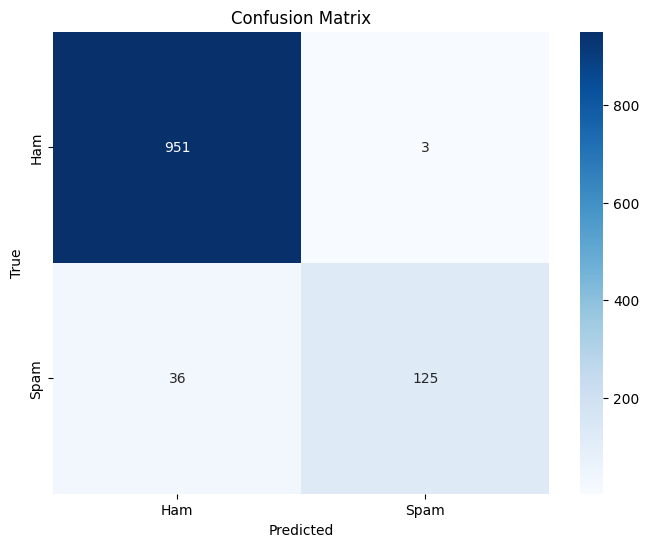

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Real time example

In [ ]:
new_sentence = "claim your coupon"

new_sentence_features = vectorizer.transform([new_sentence])

predicted_label = model.predict(new_sentence_features)

predicted_class = 'ham' if predicted_label == 0 else 'spam'

print("Predicted class for the new sentence:", predicted_class)



Predicted class for the new sentence: spam
